<a href="https://colab.research.google.com/github/Ali-Beg/Ali-Beg/blob/main/final_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Polish companies bankruptcy using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a polish company will go bankrupt in the upcomming finantial year.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given polish companies bankruptcy data, can we predict whether or not a company bancrupt or not?

## 2. Data

The original data came from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a company bancrupt during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**



  * X1 net profit / total assets
  * X2 total liabilities / total assets 
  * X3 working capital / total assets
  * X4 current assets / short-term liabilities
  * (X5[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)]* 365)
  * X6 retained earnings / total assets
  * X7 EBIT / total assets
  * X8 book value of equity / total liabilities
  * X9 sales / total assets
  * X10 equity / total assets
  * X11 (gross profit + extraordinary items + financial expenses) / total assets
  * X12 gross profit / short-term liabilities
  * X13 (gross profit + depreciation) / sales
  * X14 (gross profit + interest) / total assets
  * X15 (total liabilities * 365) / (gross profit + depreciation)
  * X16 (gross profit + depreciation) / total liabilities
  * X17 total assets / total liabilities
  * X18 gross profit / total assets
  * X19 gross profit / sales
  * X20 (inventory * 365) / sales
  * X21 sales (n) / sales (n-1)
  * X22 profit on operating activities / total assets
  * X23 net profit / sales
  * X24 gross profit (in 3 years) / total assets
  * X25 (equity - share capital) / total assets
  *  X26 (net profit + depreciation) / total liabilities
  *  X27 profit on operating activities / financial expenses
  *  X28 working capital / fixed assets
  *  X29 logarithm of total assets
  *  X30 (total liabilities - cash) / sales
  *  X31 (gross profit + interest) / sales
  *  X32 (current liabilities * 365) / cost of products sold
  *  X33 operating expenses / short-term liabilities
  *  X34 operating expenses / total liabilities
  *  X35 profit on sales / total assets
  *  X36 total sales / total assets
  *  X37 (current assets - inventories) / long-term liabilities
  *  X38 constant capital / total assets
  *  X39 profit on sales / sales
  *  X40 (current assets - inventory - receivables) / short-term liabilities
  *  X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
  *  X42 profit on operating activities / sales
  *  X43 rotation receivables + inventory turnover in days
  *  X44 (receivables * 365) / sales
  *  X45 net profit / inventory
  *  X46 (current assets - inventory) / short-term liabilities
  *  X47 (inventory * 365) / cost of products sold
  *  X48 EBITDA (profit on operating activities - depreciation) / total assets
  *  X49 EBITDA (profit on operating activities - depreciation) / sales
  * X50 current assets / total liabilities
  *  X51 short-term liabilities / total assets
  *  X52 (short-term liabilities * 365) / cost of products sold)
  *  X53 equity / fixed assets
  *  X54 constant capital / fixed assets
  *  X55 working capital
  *  X56 (sales - cost of products sold) / sales
  *  X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
  *  X58 total costs /total sales
  *  X59 long-term liabilities / equity
  *  X60 sales / inventory
  *  X61 sales / receivables
  *  X62 (short-term liabilities *365) / sales
  *  X63 sales / short-term liabilities
  *  X64 sales / fixed assets

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import RocCurveDisplay

## Load Data

In [ ]:
df=pd.read_csv("5year.csv")

## EDA (exploratory data analysis)

the goal is to find out more aout the data and ecame a suject matter expert on the dataset you are working with

1. what questions(s) are you trying to solve?
2. what kind of datra do we have and how do we treat different types?
2. what missing from the data and how do we deal woth it?
4. where are the outliners adn why should you care aout them?
5. how can you add, change or remove features to get more out of data?

In [ ]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


In [ ]:
df.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
5905,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1
5909,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,1


In [ ]:
df["class"].value_counts()

0    5500
1     410
Name: class, dtype: int64

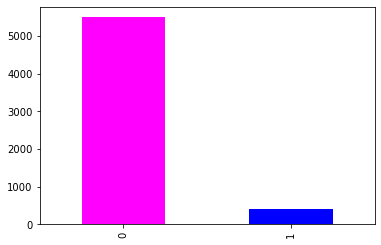

In [ ]:
df["class"].value_counts().plot(kind="bar", color=["magenta", "blue"]);

## WE have unbalanced data

In [ ]:
df.shape

(5910, 65)

In [ ]:
df.isna().sum()


Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [ ]:
df["class"].isna().sum()

0

In [ ]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,5907.000000,5907.000000,5907.000000,5889.000000,5.899000e+03,5907.000000,5907.000000,5892.000000,5909.000000,5907.000000,...,5910.000000,5907.000000,5910.000000,5907.000000,5.642000e+03,5895.000000,5910.000000,5889.000000,5803.000000,5910.000000
mean,-0.022347,0.465086,0.189155,4.892476,1.940676e+01,0.022584,-0.111951,5.737741,1.588322,0.545580,...,0.057222,-0.263837,0.956504,0.279319,9.110338e+02,10.941497,241.978184,9.127741,65.276716,0.069374
std,6.163655,5.751283,1.177729,91.434574,2.152932e+04,9.992080,9.057135,102.355101,1.548390,5.763742,...,0.698096,18.425091,0.857326,5.840554,6.415469e+04,41.166591,6221.135690,103.074304,2150.645860,0.254110
min,-463.890000,-430.870000,-72.067000,-0.403110,-1.076400e+06,-463.890000,-517.480000,-3.735100,-3.496000,-71.444000,...,-46.788000,-1236.300000,-0.164390,-184.980000,-1.244000e+01,-0.092493,-236.530000,-1.543200,-3.726500,0.000000
25%,0.003965,0.255355,0.043953,1.093700,-4.383650e+01,0.000000,0.005889,0.481865,1.014800,0.318940,...,0.010996,0.015655,0.876552,0.000000,5.248500e+00,4.278650,44.646750,3.066900,2.147500,0.000000
50%,0.046670,0.451750,0.219440,1.651700,4.914900e-01,0.000000,0.056500,1.149300,1.139700,0.523320,...,0.053218,0.109840,0.950370,0.005675,9.039500e+00,6.198900,73.778500,4.930000,4.098300,0.000000
75%,0.117050,0.661635,0.418430,2.931000,4.876500e+01,0.108725,0.136905,2.771275,1.825900,0.720805,...,0.125085,0.242910,0.990405,0.205215,1.731950e+01,9.350900,118.720000,8.115800,9.204200,0.000000
max,87.459000,72.416000,28.336000,6845.800000,1.250100e+06,543.250000,5.530000,6868.500000,65.607000,339.850000,...,1.651000,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,451380.000000,7641.300000,158180.000000,1.000000


In [ ]:
# Imputing the missing values 

df = df.fillna(df.mean())

In [ ]:
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attr1,5910.0,-0.022347,6.162090,-4.638900e+02,0.003895,0.046657,0.117040,87.459
Attr2,5910.0,0.465086,5.749823,-4.308700e+02,0.255370,0.452020,0.661530,72.416
Attr3,5910.0,0.189155,1.177430,-7.206700e+01,0.043976,0.219360,0.418318,28.336
Attr4,5910.0,4.892476,91.271954,-4.031100e-01,1.097200,1.657200,2.945700,6845.800
Attr5,5910.0,19.406758,21509.273554,-1.076400e+06,-43.699000,0.567605,48.655000,1250100.000
...,...,...,...,...,...,...,...,...
Attr61,5910.0,10.941497,41.114307,-9.249300e-02,4.280125,6.205350,9.380950,1308.500
Attr62,5910.0,241.978184,6221.135690,-2.365300e+02,44.646750,73.778500,118.720000,451380.000
Attr63,5910.0,9.127741,102.890983,-1.543200e+00,3.072575,4.943100,8.173025,7641.300
Attr64,5910.0,65.276716,2131.084988,-3.726500e+00,2.176900,4.224900,9.872550,158180.000


In [ ]:
df.shape

(5910, 65)

In [ ]:
cor_matrix= df.corr()
cor_matrix

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
Attr1,1.000000,-0.192969,0.055964,0.000903,0.000198,0.727370,0.520071,0.000584,0.095136,-0.433635,...,0.011558,0.002738,0.011704,0.000694,0.000254,0.009739,-0.002090,0.001324,-0.173136,-0.058897
Attr2,-0.192969,1.000000,-0.099898,-0.002658,-0.001352,-0.709909,0.716802,-0.003701,-0.495885,-0.796110,...,-0.015680,-0.001836,-0.098119,0.000963,0.000187,-0.074872,0.011968,-0.003677,0.001098,0.035581
Attr3,0.055964,-0.099898,1.000000,0.021429,0.004879,0.007278,0.102217,0.017484,-0.144775,0.127972,...,0.054312,0.008222,-0.059738,-0.004326,-0.000410,-0.059806,-0.065365,0.024470,0.001984,-0.132123
Attr4,0.000903,-0.002658,0.021429,1.000000,0.002202,-0.000549,0.001188,0.905787,-0.011183,0.002896,...,-0.002525,0.001134,-0.001916,-0.001963,-0.000241,-0.003771,-0.001625,0.967649,0.001346,-0.000984
Attr5,0.000198,-0.001352,0.004879,0.002202,1.000000,0.000239,0.000230,0.004463,-0.040174,0.001746,...,0.011181,0.000360,-0.010729,-0.000547,0.000053,-0.002602,-0.045057,0.000568,-0.000255,-0.035198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attr61,0.009739,-0.074872,-0.059806,-0.003771,-0.002602,0.049353,-0.069018,-0.003624,0.150896,0.056581,...,-0.007911,0.001117,0.013346,0.000982,-0.002852,1.000000,-0.004096,0.005850,-0.002028,0.023107
Attr62,-0.002090,0.011968,-0.065365,-0.001625,-0.045057,-0.006882,-0.001153,-0.001472,-0.022288,-0.012623,...,-0.161767,-0.000591,0.288514,-0.000666,-0.000083,-0.004096,1.000000,-0.002883,-0.000843,0.057565
Attr63,0.001324,-0.003677,0.024470,0.967649,0.000568,-0.000088,0.001360,0.865117,0.019123,0.003909,...,0.004444,0.001879,-0.008730,-0.001790,-0.000541,0.005850,-0.002883,1.000000,0.001620,0.007618
Attr64,-0.173136,0.001098,0.001984,0.001346,-0.000255,-0.107615,-0.117469,0.000599,0.028182,0.105074,...,-0.000827,0.000449,0.000390,-0.001376,-0.000360,-0.002028,-0.000843,0.001620,1.000000,0.004425


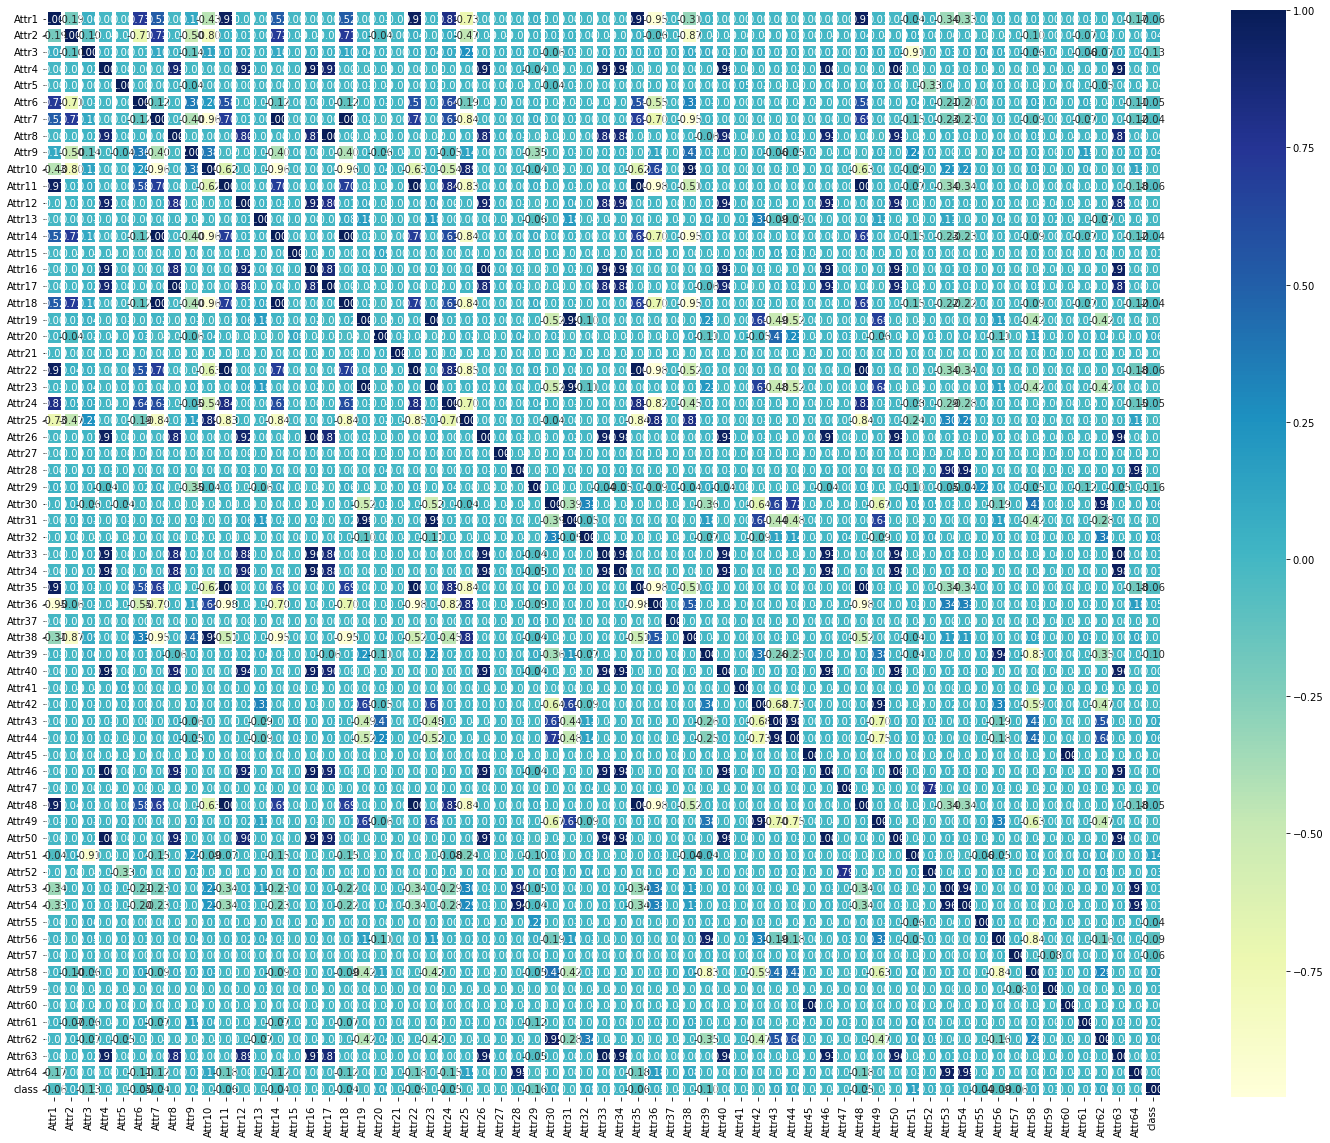

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=4,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

In [ ]:
feature=["Attr1", "Attr5", "Attr6"]

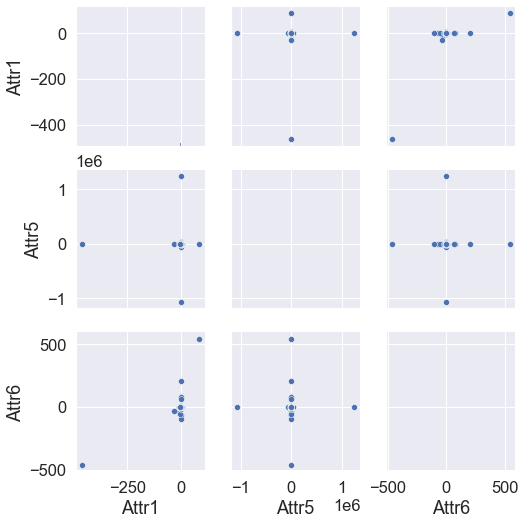

In [ ]:
sns.pairplot(df[feature])

In [ ]:
pd.crosstab(df.Attr9, df["class"])  # try difff things??

class,0,1
Attr9,,
-3.496000,0,1
0.000191,1,0
0.000672,1,0
0.000787,1,0
0.001744,1,0
...,...,...
17.923000,1,0
21.258000,1,0
22.070000,1,0


## 5 modeling

In [ ]:
X=df.drop("class", axis=1)

y=df["class"]

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 7 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. perceptron
5. SCV
6. naive_bayes
7. DesitonTree

In [ ]:
# Put models in a dictionary
# LogisticRegression(... solver='lbfgs', max_iter=100 ...)

models = {"Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
           "Perceptron": Perceptron(),
             "SVC":SVC(),
             "naive_bayes":GaussianNB(),
             "DesitionTree":DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9213197969543148,
 'KNN': 0.9196277495769881,
 'Random Forest': 0.9467005076142132,
 'Perceptron': 0.4509306260575296,
 'SVC': 0.9247038917089678,
 'naive_bayes': 0.9170896785109983,
 'DesitionTree': 0.939932318104907}

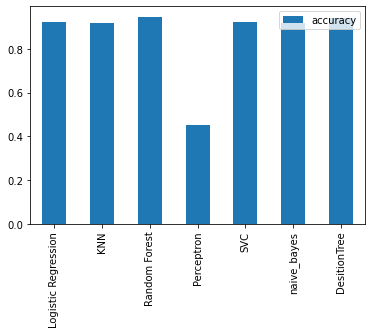

In [ ]:

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

*  till now decisionTree and randomforest are best performing classifiers

## 1 LogisticRegression

comparision diff modles on differt matrics 

In [ ]:
clf1=LogisticRegression(solver='lbfgs', max_iter=10000000)
clf1.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000000)

In [ ]:
# Make predictions with tuned model
y_preds1 = clf1.predict(X_test)

In [ ]:
y_preds1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
y_test

3491    0
5261    0
1425    0
5732    1
439     0
       ..
2617    0
2937    0
653     0
429     0
1773    0
Name: class, Length: 1182, dtype: int64

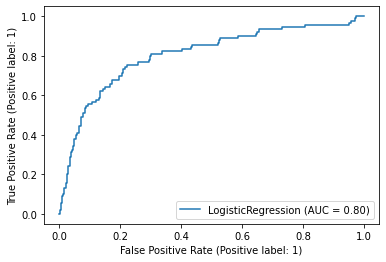

In [ ]:

randomForest_disp = RocCurveDisplay.from_estimator(clf1, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds1))

[[1086    6]
 [  85    5]]


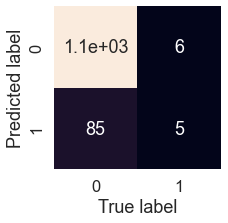

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds1):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds1),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds1)

In [ ]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1092
           1       0.45      0.06      0.10        90

    accuracy                           0.92      1182
   macro avg       0.69      0.53      0.53      1182
weighted avg       0.89      0.92      0.89      1182





## 2 RandomForest

In [ ]:
clf3=RandomForestClassifier(n_estimators=50, criterion='entropy')

In [ ]:
clf3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:

y_preds3 = clf3.predict(X_test)
y_preds3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

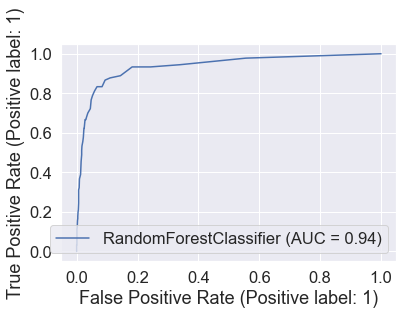

In [ ]:
randomForest_disp = RocCurveDisplay.from_estimator(clf3, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds3))

[[1078   14]
 [  55   35]]


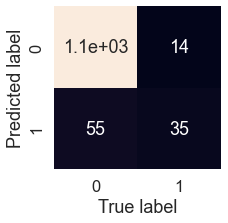

In [ ]:

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds3):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds3),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()

plot_conf_mat(y_test, y_preds3)

In [ ]:
print(classification_report(y_test, y_preds3))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1092
           1       0.71      0.39      0.50        90

    accuracy                           0.94      1182
   macro avg       0.83      0.69      0.74      1182
weighted avg       0.93      0.94      0.93      1182



## 3 Decision Tree

In [ ]:
clf6=DecisionTreeClassifier()
clf6.fit(X_train, y_train)

y_preds6 = clf1.predict(X_test)
y_preds6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

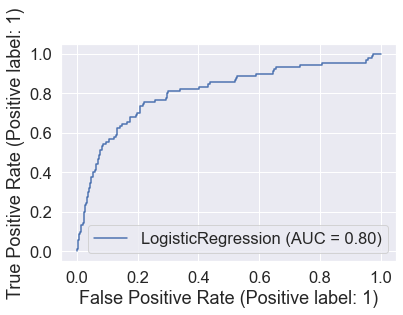

In [ ]:
DecidsionTree_disp = RocCurveDisplay.from_estimator(clf1, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds6))

[[1086    6]
 [  85    5]]


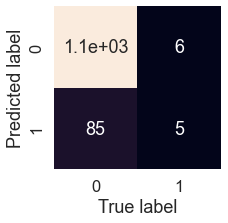

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds6):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds6),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds6)

In [ ]:
clf6_plot=print(classification_report(y_test, y_preds6))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1092
           1       0.45      0.06      0.10        90

    accuracy                           0.92      1182
   macro avg       0.69      0.53      0.53      1182
weighted avg       0.89      0.92      0.89      1182



-----------------------------------------

here till now we are able to achive good accuracy score but that's not enougf
* accuracy score is not a good metrix to evaluate the classifier train on imblance data
* for imabalance data precision, recall and f1 scores are good metrix to evaluate

### handling the imbalance data via SMOTE

#### random Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")

In [ ]:
X, y = smote.fit_resample(X,y)

In [ ]:
y.value_counts()

0    5500
1    5500
Name: class, dtype: int64

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
y_test.value_counts()

0    1108
1    1092
Name: class, dtype: int64

In [ ]:
y_train.value_counts()

1    4408
0    4392
Name: class, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model again.

We're going to try 7 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. perceptron
5. SCV
6. naive_bayes
7. DesitonTree

In [ ]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
           "Perceptron": Perceptron(),
             "SVC":SVC(),
             "naive_bayes":GaussianNB(),
             "DesitionTree":DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.655,
 'KNN': 0.8827272727272727,
 'Random Forest': 0.9745454545454545,
 'Perceptron': 0.6313636363636363,
 'SVC': 0.625,
 'naive_bayes': 0.5113636363636364,
 'DesitionTree': 0.9354545454545454}

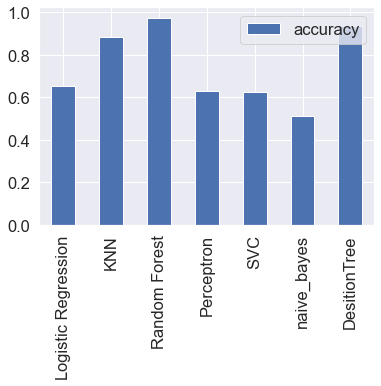

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always it' s last.

Let's look at the following:
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)


for further processing i have chose 3 classifiers out of 7

## 1 Logistic regression

In [ ]:
clf1=LogisticRegression(solver='lbfgs', max_iter=1000)
clf1.fit(X_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

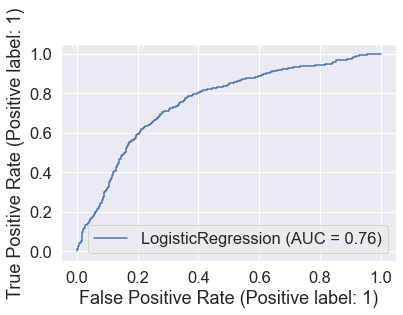

In [ ]:
# Make predictions with tuned model
y_preds1 = clf1.predict(X_test)
y_preds1
y_test

randomForest_disp = RocCurveDisplay.from_estimator(clf1, X_test, y_test)


In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds1))


[[660 448]
 [209 883]]


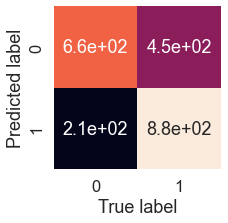

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds1):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds1),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds1)

In [ ]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1108
           1       0.66      0.81      0.73      1092

    accuracy                           0.70      2200
   macro avg       0.71      0.70      0.70      2200
weighted avg       0.71      0.70      0.70      2200



### calculate evaluation matrix using cross validation 

In [ ]:
# Cross-validated accuracy
cv_acc1 = cross_val_score(clf1,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.70863636, 0.72      , 0.65681818, 0.69136364, 0.66636364])

In [ ]:
cv_acc1 = np.mean(cv_acc1)
cv_acc1

0.6886363636363637

In [ ]:
# Cross-validated precision
cv_precision1 = cross_val_score(clf1,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision1=np.mean(cv_precision1)
cv_precision1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.6525945976324801

In [ ]:
# Cross-validated recall
cv_recall1 = cross_val_score(clf1,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall1 = np.mean(cv_recall1)
cv_recall1

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8174545454545455

In [ ]:
# Cross-validated f1-score
cv_f11 = cross_val_score(clf1,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f11 = np.mean(cv_f11)
cv_f11

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7244301377366116

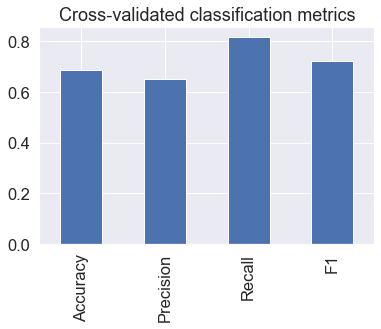

In [ ]:
# Visualize cross-validated metrics
cv_metrics1 = pd.DataFrame({"Accuracy": cv_acc1,
                           "Precision": cv_precision1,
                           "Recall": cv_recall1,
                           "F1": cv_f11},
                          index=[0])

cv_metrics1.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);



## 2 RandomForest

In [ ]:
clf_randomforest=RandomForestClassifier(n_estimators=150, criterion="entropy")

In [ ]:
clf_randomforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [ ]:
# Make predictions with tuned model
y_predsR = clf_randomforest.predict(X_test)
y_predsR

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

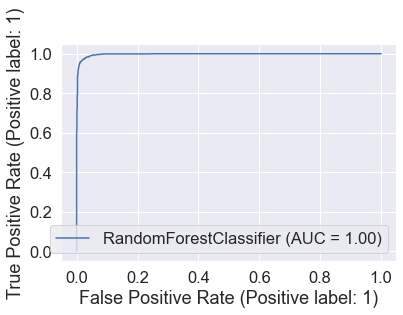

In [ ]:
randomForestFinal_disp = RocCurveDisplay.from_estimator(clf_randomforest, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_predsR))

[[1069   39]
 [  18 1074]]


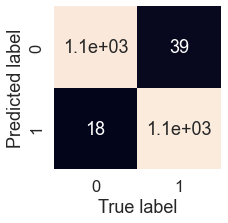

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_predsR):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predsR),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_predsR)

In [ ]:

print(classification_report(y_test, y_predsR))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1108
           1       0.96      0.98      0.97      1092

    accuracy                           0.97      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.97      0.97      0.97      2200



### calculate evaluation matrix using cross validation 

In [ ]:
# Cross-validated accuracy
cv_accR = cross_val_score(clf_randomforest,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accR


cv_accR = np.mean(cv_accR)
cv_accR

0.9737272727272727

In [ ]:
# Cross-validated precision
cv_precisionR = cross_val_score(clf_randomforest,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precisionR=np.mean(cv_precisionR)
cv_precisionR

0.9612036078835013

In [ ]:
# Cross-validated recall
cv_recallR = cross_val_score(clf_randomforest,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recallR = np.mean(cv_recallR)
cv_recallR

0.9892727272727273

In [ ]:
# Cross-validated f1-score
cv_f1R = cross_val_score(clf_randomforest,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1R = np.mean(cv_f1R)
cv_f1R

0.9753387897799184

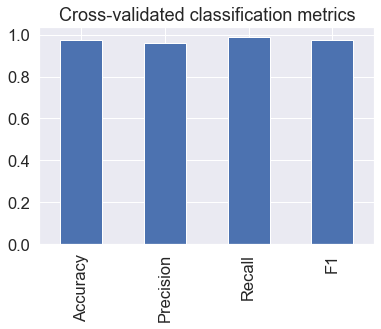

In [ ]:
# Visualize cross-validated metrics
cv_metricsR = pd.DataFrame({"Accuracy": cv_accR,
                           "Precision": cv_precisionR,
                           "Recall": cv_recallR,
                           "F1": cv_f1R},
                          index=[0])

cv_metricsR.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## 3 DecisionTree

In [ ]:
clf_decisionTree1=DecisionTreeClassifier()

## parameter tunning via Gridsearch CV

# Create the parameter grid  
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
clf_decisionTree = GridSearchCV(estimator=clf_decisionTree1, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [ ]:
clf_decisionTree.fit(X_train, y_train)

# Make predictions with tuned model
y_predsD = clf_decisionTree.predict(X_test)
y_predsD

Fitting 4 folds for each of 50 candidates, totalling 200 fits


array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

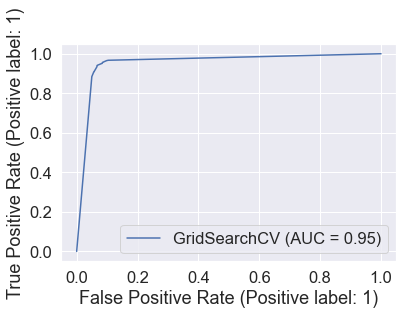

In [ ]:
decisionTree_disp = RocCurveDisplay.from_estimator(clf_decisionTree, X_test, y_test)

In [ ]:

# Confusion matrix
print(confusion_matrix(y_test, y_predsD))

[[1034   74]
 [  70 1022]]


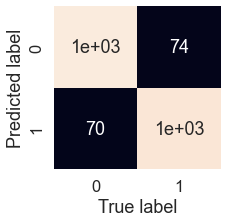

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_predsD):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predsD),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
plot_conf_mat(y_test, y_predsD)

In [ ]:
print(classification_report(y_test, y_predsD))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1108
           1       0.93      0.94      0.93      1092

    accuracy                           0.93      2200
   macro avg       0.93      0.93      0.93      2200
weighted avg       0.93      0.93      0.93      2200



In [ ]:
clf_decisionTree.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
# Creating model with best param to cross validate
clf_dcisionTree=DecisionTreeClassifier(criterion="entropy", max_depth=20, min_samples_leaf=5)


In [ ]:

# Cross-validated accuracy
cv_accD = cross_val_score(clf_decisionTree,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_accD
 

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits


array([0.92409091, 0.93772727, 0.91545455, 0.93454545, 0.93681818])

In [ ]:

cv_accD = np.mean(cv_accD)
cv_accD

0.9297272727272727

In [ ]:
# Cross-validated precision
cv_precisionD = cross_val_score(clf_decisionTree,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precisionD=np.mean(cv_precisionD)
cv_precisionD

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits


0.9249096772050004

In [ ]:

# Cross-validated recall
cv_recallD = cross_val_score(clf_decisionTree,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recallD = np.mean(cv_recallD)
cv_recallD

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits


0.9343636363636364

In [ ]:
# Cross-validated f1-score
cv_f1D = cross_val_score(clf_decisionTree,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1D = np.mean(cv_f1D)
cv_f1D

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits
Fitting 4 folds for each of 50 candidates, totalling 200 fits


0.9297045703557668

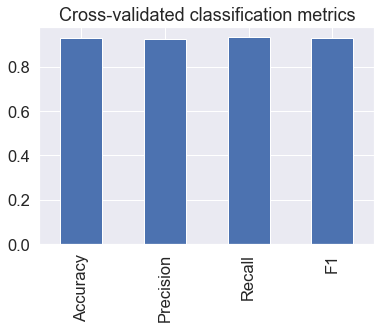

In [ ]:
# Visualize cross-validated metrics
cv_metricsD = pd.DataFrame({"Accuracy": cv_accD,
                           "Precision": cv_precisionD,
                           "Recall": cv_recallD,
                           "F1": cv_f1D},
                          index=[0])

cv_metricsD.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);


we achieved our goal of 95% accuracy